# Data section

## In this section, I will first download the data from the site and select the useful data to explore the Paris.

In [3]:
import pandas as pd

import json # library to handle JSON files
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
import folium # map rendering library
import numpy as np # library to handle data in a vectorized manner

print('Libraries imported.')

Libraries imported.


## The postal data can be download via the link https://www.data.gouv.fr/fr/datasets/base-officielle-des-codes-postaux/

## Reading data :

In [4]:
raw_df = pd.read_csv(r'C:\Users\daile\Downloads\MOOC\Coursera\Capstone\paris-neighborhood-capstone\laposte_hexasmal.csv',';')

In [5]:
raw_df

,Code_commune_INSEE,Nom_commune,Code_postal,Ligne_5,Libellé_d_acheminement,Libell_d_acheminement,coordonnees_gps
0,01001,L ABERGEMENT CLEMENCIAT,1400,NaN,L ABERGEMENT CLEMENCIAT,L ABERGEMENT CLEMENCIAT,"46.1534255214,4.92611354223"
1,01005,AMBERIEUX EN DOMBES,1330,NaN,AMBERIEUX EN DOMBES,AMBERIEUX EN DOMBES,"45.9961799872,4.91227250796"
2,01009,ANDERT ET CONDON,1300,NaN,ANDERT ET CONDON,ANDERT ET CONDON,"45.7873565333,5.65788307924"
3,01017,ARGIS,1230,NaN,ARGIS,ARGIS,"45.9337182132,5.48251100314"
4,01019,ARMIX,1510,NaN,ARMIX,ARMIX,"45.8541838459,5.58357838695"
...,...,...,...,...,...,...,...
39187,98808,HOUAILOU,98816,NaN,HOUAILOU,HOUAILOU,NaN
39188,98817,LE MONT DORE,98810,NaN,MONT DORE,MONT DORE,NaN
39189,98817,LE MONT DORE,98875,LE MONT DORE,PLUM,PLUM,NaN
39190,98822,POINDIMIE,98822,NaN,POINDIMIE,POINDIMIE,NaN


#### I need to first translate the French to English. So I rename the columns from 'Code_postal' to 'Postcode', from 'Nom_commune' to 'Borough'. 

In [6]:
df1 = raw_df.rename(columns={'Code_postal': 'Postcode', 'Nom_commune' : 'Borough'})
df1
                          

,Code_commune_INSEE,Borough,Postcode,Ligne_5,Libellé_d_acheminement,Libell_d_acheminement,coordonnees_gps
0,01001,L ABERGEMENT CLEMENCIAT,1400,NaN,L ABERGEMENT CLEMENCIAT,L ABERGEMENT CLEMENCIAT,"46.1534255214,4.92611354223"
1,01005,AMBERIEUX EN DOMBES,1330,NaN,AMBERIEUX EN DOMBES,AMBERIEUX EN DOMBES,"45.9961799872,4.91227250796"
2,01009,ANDERT ET CONDON,1300,NaN,ANDERT ET CONDON,ANDERT ET CONDON,"45.7873565333,5.65788307924"
3,01017,ARGIS,1230,NaN,ARGIS,ARGIS,"45.9337182132,5.48251100314"
4,01019,ARMIX,1510,NaN,ARMIX,ARMIX,"45.8541838459,5.58357838695"
...,...,...,...,...,...,...,...
39187,98808,HOUAILOU,98816,NaN,HOUAILOU,HOUAILOU,NaN
39188,98817,LE MONT DORE,98810,NaN,MONT DORE,MONT DORE,NaN
39189,98817,LE MONT DORE,98875,LE MONT DORE,PLUM,PLUM,NaN
39190,98822,POINDIMIE,98822,NaN,POINDIMIE,POINDIMIE,NaN


#### It is very important to deal with Nan. I decide to drop the raws with NaN in the 'coordnnees_gps'. There is a very good web explaining the Nan https://towardsdatascience.com/navigating-the-hell-of-nans-in-python-71b12558895b 

In [46]:
#for x in df1['coordonnees_gps']:
    
 #   print (x in [np.nan])

In [6]:
#df.drop(['B', 'C'], axis=1)

df2 = df1.drop(['Ligne_5'],axis = 1)
df2

,Code_commune_INSEE,Borough,Postcode,Libellé_d_acheminement,Libell_d_acheminement,coordonnees_gps
0,01001,L ABERGEMENT CLEMENCIAT,1400,L ABERGEMENT CLEMENCIAT,L ABERGEMENT CLEMENCIAT,"46.1534255214,4.92611354223"
1,01005,AMBERIEUX EN DOMBES,1330,AMBERIEUX EN DOMBES,AMBERIEUX EN DOMBES,"45.9961799872,4.91227250796"
2,01009,ANDERT ET CONDON,1300,ANDERT ET CONDON,ANDERT ET CONDON,"45.7873565333,5.65788307924"
3,01017,ARGIS,1230,ARGIS,ARGIS,"45.9337182132,5.48251100314"
4,01019,ARMIX,1510,ARMIX,ARMIX,"45.8541838459,5.58357838695"
...,...,...,...,...,...,...
39187,98808,HOUAILOU,98816,HOUAILOU,HOUAILOU,NaN
39188,98817,LE MONT DORE,98810,MONT DORE,MONT DORE,NaN
39189,98817,LE MONT DORE,98875,PLUM,PLUM,NaN
39190,98822,POINDIMIE,98822,POINDIMIE,POINDIMIE,NaN


In [7]:
#drop the rows with nan cells 

df3 = df2.dropna()
df3

,Code_commune_INSEE,Borough,Postcode,Libellé_d_acheminement,Libell_d_acheminement,coordonnees_gps
0,01001,L ABERGEMENT CLEMENCIAT,1400,L ABERGEMENT CLEMENCIAT,L ABERGEMENT CLEMENCIAT,"46.1534255214,4.92611354223"
1,01005,AMBERIEUX EN DOMBES,1330,AMBERIEUX EN DOMBES,AMBERIEUX EN DOMBES,"45.9961799872,4.91227250796"
2,01009,ANDERT ET CONDON,1300,ANDERT ET CONDON,ANDERT ET CONDON,"45.7873565333,5.65788307924"
3,01017,ARGIS,1230,ARGIS,ARGIS,"45.9337182132,5.48251100314"
4,01019,ARMIX,1510,ARMIX,ARMIX,"45.8541838459,5.58357838695"
...,...,...,...,...,...,...
39132,97605,CHICONI,97670,CHICONI,CHICONI,"-12.821522233,45.1132970298"
39133,97608,DZAOUDZI,97615,DZAOUDZI,DZAOUDZI,"-12.7791666355,45.2822648358"
39134,97611,MAMOUDZOU,97605,MAMOUDZOU,MAMOUDZOU,"-12.7899979586,45.1932456026"
39135,97613,M TSANGAMOUJI,97650,M TSANGAMOUJI,M TSANGAMOUJI,"-12.7513099309,45.0871696871"


In [11]:
# split the column of 'coordonnees_gps' into two columns 'Latitude' and 'Longitude'
#i.e. df[['First','Last']] = df.Name.str.split(" ",expand=True,)

df3[['Latitude','Longitude']] = df3.coordonnees_gps.str.split(',',expand = True)
df3


,Code_commune_INSEE,Borough,Postcode,Libellé_d_acheminement,Libell_d_acheminement,coordonnees_gps,Latitude,Longitude
0,01001,L ABERGEMENT CLEMENCIAT,1400,L ABERGEMENT CLEMENCIAT,L ABERGEMENT CLEMENCIAT,"46.1534255214,4.92611354223",46.1534255214,4.92611354223
1,01005,AMBERIEUX EN DOMBES,1330,AMBERIEUX EN DOMBES,AMBERIEUX EN DOMBES,"45.9961799872,4.91227250796",45.9961799872,4.91227250796
2,01009,ANDERT ET CONDON,1300,ANDERT ET CONDON,ANDERT ET CONDON,"45.7873565333,5.65788307924",45.7873565333,5.65788307924
3,01017,ARGIS,1230,ARGIS,ARGIS,"45.9337182132,5.48251100314",45.9337182132,5.48251100314
4,01019,ARMIX,1510,ARMIX,ARMIX,"45.8541838459,5.58357838695",45.8541838459,5.58357838695
...,...,...,...,...,...,...,...,...
39132,97605,CHICONI,97670,CHICONI,CHICONI,"-12.821522233,45.1132970298",-12.821522233,45.1132970298
39133,97608,DZAOUDZI,97615,DZAOUDZI,DZAOUDZI,"-12.7791666355,45.2822648358",-12.7791666355,45.2822648358
39134,97611,MAMOUDZOU,97605,MAMOUDZOU,MAMOUDZOU,"-12.7899979586,45.1932456026",-12.7899979586,45.1932456026
39135,97613,M TSANGAMOUJI,97650,M TSANGAMOUJI,M TSANGAMOUJI,"-12.7513099309,45.0871696871",-12.7513099309,45.0871696871


#### I only need to select four columes 'Postcode' , 'Borough' , 'Latitude' , 'Longitude'.

In [12]:
df4 = df3[{'Postcode','Borough','Latitude','Longitude'}]
df4

,Borough,Postcode,Longitude,Latitude
0,L ABERGEMENT CLEMENCIAT,1400,4.92611354223,46.1534255214
1,AMBERIEUX EN DOMBES,1330,4.91227250796,45.9961799872
2,ANDERT ET CONDON,1300,5.65788307924,45.7873565333
3,ARGIS,1230,5.48251100314,45.9337182132
4,ARMIX,1510,5.58357838695,45.8541838459
...,...,...,...,...
39132,CHICONI,97670,45.1132970298,-12.821522233
39133,DZAOUDZI,97615,45.2822648358,-12.7791666355
39134,MAMOUDZOU,97605,45.1932456026,-12.7899979586
39135,M TSANGAMOUJI,97650,45.0871696871,-12.7513099309


In [13]:
# set the order of columns with 'Postcode' , 'Borough' , 'Latitude' , 'Longitude'.
columnsTitles = ['Postcode' , 'Borough' , 'Latitude' , 'Longitude']

#i.e. frame = frame.reindex(columns=columnsTitles)
df4 = df4.reindex(columns=columnsTitles)
df4

,Postcode,Borough,Latitude,Longitude
0,1400,L ABERGEMENT CLEMENCIAT,46.1534255214,4.92611354223
1,1330,AMBERIEUX EN DOMBES,45.9961799872,4.91227250796
2,1300,ANDERT ET CONDON,45.7873565333,5.65788307924
3,1230,ARGIS,45.9337182132,5.48251100314
4,1510,ARMIX,45.8541838459,5.58357838695
...,...,...,...,...
39132,97670,CHICONI,-12.821522233,45.1132970298
39133,97615,DZAOUDZI,-12.7791666355,45.2822648358
39134,97605,MAMOUDZOU,-12.7899979586,45.1932456026
39135,97650,M TSANGAMOUJI,-12.7513099309,45.0871696871


### Saving data into csv file for the next analysis

In [14]:
df4.head()

,Postcode,Borough,Latitude,Longitude
0,1400,L ABERGEMENT CLEMENCIAT,46.1534255214,4.92611354223
1,1330,AMBERIEUX EN DOMBES,45.9961799872,4.91227250796
2,1300,ANDERT ET CONDON,45.7873565333,5.65788307924
3,1230,ARGIS,45.9337182132,5.48251100314
4,1510,ARMIX,45.8541838459,5.58357838695


In [15]:
df4.to_csv('france_geo.csv', index = False, encoding='utf-8')

In [16]:
df5 = pd.read_csv('france_geo.csv')
df5

,Postcode,Borough,Latitude,Longitude
0,1400,L ABERGEMENT CLEMENCIAT,46.153426,4.926114
1,1330,AMBERIEUX EN DOMBES,45.996180,4.912273
2,1300,ANDERT ET CONDON,45.787357,5.657883
3,1230,ARGIS,45.933718,5.482511
4,1510,ARMIX,45.854184,5.583578
...,...,...,...,...
38917,97670,CHICONI,-12.821522,45.113297
38918,97615,DZAOUDZI,-12.779167,45.282265
38919,97605,MAMOUDZOU,-12.789998,45.193246
38920,97650,M TSANGAMOUJI,-12.751310,45.087170


In [17]:
df5.shape

(38922, 4)

In [18]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38922 entries, 0 to 38921
Data columns (total 4 columns):
Postcode     38922 non-null int64
Borough      38922 non-null object
Latitude     38922 non-null float64
Longitude    38922 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.2+ MB


## I notice that the borough name in Paris is like 'PARIS 01', 'PARIS 02' and so on. It is not exactly the same as which can be detected in Foursqure. So I need to rename them. The data is from the website 'https://en.wikipedia.org/wiki/Arrondissements_of_Paris'

In [19]:
# i.e. df.loc[df[<some_column_name>] == <condition>, [<another_column_name>]] = <value_to_add>

df5.loc[df5['Postcode'] == 75001, ['Borough']] = ('LOUVRE').upper()
df5.loc[df5['Postcode'] == 75002, ['Borough']] = ('BOURSE').upper()
df5.loc[df5['Postcode'] == 75003, ['Borough']] = ('TEMPLE').upper()
df5.loc[df5['Postcode'] == 75004, ['Borough']] = ('HOTEL-DE-VILLE').upper()
df5.loc[df5['Postcode'] == 75005, ['Borough']] = ('Pantheon').upper()
df5.loc[df5['Postcode'] == 75006, ['Borough']] = ('Luxembourg').upper()
df5.loc[df5['Postcode'] == 75007, ['Borough']] = ('Palais-Bourbon').upper()
df5.loc[df5['Postcode'] == 75008, ['Borough']] = ('Elysee').upper()
df5.loc[df5['Postcode'] == 75009, ['Borough']] = ('Opera').upper()
df5.loc[df5['Postcode'] == 75010, ['Borough']] = ('Entrepot').upper()
df5.loc[df5['Postcode'] == 75011, ['Borough']] = ('Popincourt').upper()
df5.loc[df5['Postcode'] == 75012, ['Borough']] = ('Reuilly').upper()
df5.loc[df5['Postcode'] == 75013, ['Borough']] = ('Gobelins').upper()
df5.loc[df5['Postcode'] == 75014, ['Borough']] = ('Observatoire').upper()
df5.loc[df5['Postcode'] == 75015, ['Borough']] = ('Vaugirard').upper()
df5.loc[df5['Postcode'] == 75016, ['Borough']] = ('Passy').upper()
df5.loc[df5['Postcode'] == 75017, ['Borough']] = ('Batignolles-Monceau').upper()
df5.loc[df5['Postcode'] == 75018, ['Borough']] = ('Butte-Montmartre').upper()
df5.loc[df5['Postcode'] == 75019, ['Borough']] = ('Buttes-Chaumont').upper()
df5.loc[df5['Postcode'] == 75020, ['Borough']] = ('Menilmontant').upper()

In [20]:
df5.loc[df5['Postcode'] == 75016, ['Borough']]

,Borough
6491,PASSY


### Because we are interested in the area of Paris or Petite Couronne. We know that they have the Postcode starting with 75, 92, 93, 94. We create a new dataframe df75, df92, df93 and df94 with only the boroughs in Grand Paris area. The definition of Petite Couronne is from https://en.wikipedia.org/wiki/%C3%8Ele-de-France. You can see the image of this region.

In [21]:
from IPython.display import SVG, display

In [22]:
def show_svg():
    display(SVG(url='https://upload.wikimedia.org/wikipedia/commons/6/6f/Petite_couronne.svg'))

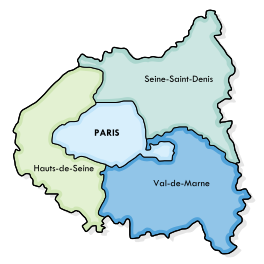

In [23]:
show_svg()

In [29]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [34]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print ('ok')

ok


In [36]:
address = 'Paris'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Paris are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Paris are 48.8566969, 2.3514616.


In [31]:
#Postcode with 75xxx means the Paris city
df75 = df5[(df5['Postcode'] > 75000) & (df5['Postcode'] < 75021)]
df75

,Postcode,Borough,Latitude,Longitude
6487,75001,LOUVRE,48.862630,2.336293
6488,75005,PANTHEON,48.844509,2.349859
6489,75009,OPERA,48.876896,2.337460
6490,75010,ENTREPOT,48.876029,2.361113
6491,75016,PASSY,48.860399,2.262100
6493,75020,MENILMONTANT,48.863187,2.400820
18762,75014,OBSERVATOIRE,48.828993,2.327101
21967,75008,ELYSEE,48.872527,2.312583
21968,75018,BUTTE-MONTMARTRE,48.892735,2.348712
29716,75004,HOTEL-DE-VILLE,48.854228,2.357362


In [37]:
# create map of Paris city using latitude and longitude values
map_75 = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, borough in zip(df75['Latitude'], 
                             df75['Longitude'], 
                             df75['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_75)  
    
map_75

In [38]:
#Postcode with 92xxx means the Hauts-de-Seine province
df92 = df5[(df5['Postcode'] >= 92000) & (df5['Postcode'] < 92999)]
df92

,Postcode,Borough,Latitude,Longitude
7660,92290,CHATENAY MALABRY,48.768169,2.262826
7661,92700,COLOMBES,48.922518,2.246752
7662,92260,FONTENAY AUX ROSES,48.789730,2.287235
7663,92380,GARCHES,48.845011,2.186650
7664,92230,GENNEVILLIERS,48.934519,2.293850
7665,92240,MALAKOFF,48.816970,2.296936
7666,92500,RUEIL MALMAISON,48.869190,2.177341
7667,92150,SURESNES,48.869848,2.219655
21040,92340,BOURG LA REINE,48.779907,2.316430
21042,92000,NANTERRE,48.896070,2.206713


In [39]:
# create map of Hauts de Seine province using latitude and longitude values
map_92 = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, borough in zip(df92['Latitude'], 
                             df92['Longitude'], 
                             df92['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_92)  
    
map_92

In [40]:
#Postcode with 93xxx means the Seine-Saint-Denis province
df93 = df5[(df5['Postcode'] >= 93000) & (df5['Postcode'] < 93999)]
df93

,Postcode,Borough,Latitude,Longitude
7668,93460,GOURNAY SUR MARNE,48.860582,2.575433
7669,93260,LES LILAS,48.881921,2.419668
7670,93500,PANTIN,48.898309,2.408721
7671,93320,LES PAVILLONS SOUS BOIS,48.908206,2.502974
7672,93110,ROSNY SOUS BOIS,48.874576,2.486340
7673,93270,SEVRAN,48.938607,2.531241
7674,93290,TREMBLAY EN FRANCE,48.978430,2.554685
7675,93430,VILLETANEUSE,48.957298,2.345066
21044,93150,LE BLANC MESNIL,48.939548,2.461121
21046,93390,CLICHY SOUS BOIS,48.907629,2.546202


In [41]:
# create map of Seine-Saint-Denis province using latitude and longitude values
map_93 = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, borough in zip(df93['Latitude'], 
                             df93['Longitude'], 
                             df93['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_93)  
    
map_93

In [42]:
#Postcode with 94xxx means the Val-de-Marne province
df94 = df5[(df5['Postcode'] >= 94000) & (df5['Postcode'] < 94999)]
df94

,Postcode,Borough,Latitude,Longitude
7676,94110,ARCUEIL,48.805880,2.333510
7677,94360,BRY SUR MARNE,48.838410,2.523197
7678,94500,CHAMPIGNY SUR MARNE,48.817254,2.517098
7679,94170,LE PERREUX SUR MARNE,48.842395,2.504068
7680,94150,RUNGIS,48.749482,2.352818
7681,94160,ST MANDE,48.842440,2.419219
7682,94210,ST MAUR DES FOSSES,48.799068,2.493865
7683,94440,SANTENY,48.735618,2.576375
7684,94440,VILLECRESNES,48.720869,2.531577
7685,94300,VINCENNES,48.847373,2.437987


In [43]:
# create map of Val-de-Marne province using latitude and longitude values
map_94 = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, borough in zip(df94['Latitude'], 
                             df94['Longitude'], 
                             df94['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_94)  
    
map_94

## We combine df75, df92, df93 and df94 to create a new dataframe df_paris

In [44]:
df_paris = pd.concat([df75,df92,df93,df94])
df_paris

,Postcode,Borough,Latitude,Longitude
6487,75001,LOUVRE,48.862630,2.336293
6488,75005,PANTHEON,48.844509,2.349859
6489,75009,OPERA,48.876896,2.337460
6490,75010,ENTREPOT,48.876029,2.361113
6491,75016,PASSY,48.860399,2.262100
...,...,...,...,...
38839,94310,ORLY,48.742932,2.394683
38840,94320,THIAIS,48.760784,2.385377
38841,94460,VALENTON,48.752872,2.461295
38842,94800,VILLEJUIF,48.792855,2.360061


In [45]:
# create map of Val-de-Marne province using latitude and longitude values
map_paris = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, borough in zip(df_paris['Latitude'], 
                             df_paris['Longitude'], 
                             df_paris['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_paris)  
    
map_paris

### Define Foursquare Credentials and Version

In [46]:
CLIENT_ID = 'KWDLRJY20WXGTOSL1K3DH2PM0KUBB2D2XMXUGTFP3ULBFD4N' # your Foursquare ID
CLIENT_SECRET = 'MS2QV0FFE4UNAE5FYHUGR5EDJVFILSX1IQO3THXORQ3SCN51' # your Foursquare Secret
VERSION = '20200320' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KWDLRJY20WXGTOSL1K3DH2PM0KUBB2D2XMXUGTFP3ULBFD4N
CLIENT_SECRET:MS2QV0FFE4UNAE5FYHUGR5EDJVFILSX1IQO3THXORQ3SCN51


### Get the borough's name (For example 'LOUVRE'). And then get the borough's latitude and longitude values.

In [47]:
latitude = df_paris.loc[df_paris['Borough'] == 'LOUVRE', ['Latitude']].iloc[0,0] # neighborhood latitude value
longitude = df_paris.loc[df_paris['Borough'] == 'LOUVRE', ['Longitude']].iloc[0,0] # neighborhood longitude value
name = 'LOUVRE'

print('Latitude and longitude values of {} are {}, {}.'.format(name, 
                                                               latitude, 
                                                               longitude))

Latitude and longitude values of LOUVRE are 48.86263048520001, 2.33629344655.


### Now, let's get the top 100 venues that are in LOUVRE within a radius of 500 meters.

First, let's create the GET request URL. Name your URL **url**.

In [48]:
#The correct answer is:
LIMIT = 100 # limit of number of venues returned by Foursquare API


radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url # display URL
 

'https://api.foursquare.com/v2/venues/explore?&client_id=KWDLRJY20WXGTOSL1K3DH2PM0KUBB2D2XMXUGTFP3ULBFD4N&client_secret=MS2QV0FFE4UNAE5FYHUGR5EDJVFILSX1IQO3THXORQ3SCN51&v=20200320&ll=48.86263048520001,2.33629344655&radius=500&limit=100'

Send the GET request and examine the resutls

In [49]:
import json # library to handle JSON files

In [50]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e761abfaba297001b3b226a'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Palais-Royal',
  'headerFullLocation': 'Palais-Royal, Paris',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 134,
  'suggestedBounds': {'ne': {'lat': 48.86713048970001,
    'lng': 2.3431209743572086},
   'sw': {'lat': 48.858130480700005, 'lng': 2.3294659187427915}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4adcda10f964a520af3521e3',
       'name': 'Musée du Louvre',
       'location': {'address': 'Rue de Rivoli',
        'crossStreet': 'Place du Carrousel',
        'lat': 48.86084691113991,
        'lng': 2.336440086364746,
        'labeledLatLng

From the Foursquare lab in the previous module, we know that all the information is in the *items* key. Before we proceed, let's borrow the **get_category_type** function from the Foursquare lab.

In [51]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a pandas dataframe.

In [52]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Musée du Louvre,Art Museum,48.860847,2.336440
1,Palais Royal,Historic Site,48.863236,2.337127
2,Comédie-Française,Theater,48.863088,2.336612
3,Cour Napoléon,Plaza,48.861172,2.335088
4,Place du Palais Royal,Plaza,48.862523,2.336688


And how many venues were returned by Foursquare?

In [53]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


## 2. Explore Boroughs in Paris city

#### Let's create a function to repeat the same process to all the neighborhoods in Paris

In [54]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now write the code to run the above function on each neighborhood and create a new dataframe called *Paris_venues*.

In [55]:
Paris_venues = getNearbyVenues(names=df75['Borough'],
                                   latitudes=df75['Latitude'],
                                   longitudes=df75['Longitude']
                                  )

LOUVRE
PANTHEON
OPERA
ENTREPOT
PASSY
MENILMONTANT
OBSERVATOIRE
ELYSEE
BUTTE-MONTMARTRE
HOTEL-DE-VILLE
LUXEMBOURG
PALAIS-BOURBON
POPINCOURT
BATIGNOLLES-MONCEAU
BOURSE
TEMPLE
REUILLY
GOBELINS
VAUGIRARD
BUTTES-CHAUMONT


#### Let's check the size of the resulting dataframe

In [56]:
print(Paris_venues.shape)
Paris_venues.head()

(1365, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,LOUVRE,48.86263,2.336293,Musée du Louvre,48.860847,2.336440,Art Museum
1,LOUVRE,48.86263,2.336293,Palais Royal,48.863236,2.337127,Historic Site
2,LOUVRE,48.86263,2.336293,Comédie-Française,48.863088,2.336612,Theater
3,LOUVRE,48.86263,2.336293,Cour Napoléon,48.861172,2.335088,Plaza
4,LOUVRE,48.86263,2.336293,Place du Palais Royal,48.862523,2.336688,Plaza


Let's check how many venues were returned for each neighborhood

In [57]:
Paris_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
BATIGNOLLES-MONCEAU,64,64,64,64,64,64
BOURSE,100,100,100,100,100,100
BUTTE-MONTMARTRE,69,69,69,69,69,69
BUTTES-CHAUMONT,49,49,49,49,49,49
ELYSEE,56,56,56,56,56,56
ENTREPOT,100,100,100,100,100,100
GOBELINS,60,60,60,60,60,60
HOTEL-DE-VILLE,100,100,100,100,100,100
LOUVRE,100,100,100,100,100,100


#### Let's find out how many unique categories can be curated from all the returned venues

In [58]:
print('There are {} uniques categories.'.format(len(Paris_venues['Venue Category'].unique())))

There are 210 uniques categories.


## 3. Analyze Each Neighborhood

In [59]:
# one hot encoding
Paris_onehot = pd.get_dummies(Paris_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Paris_onehot['Neighborhood'] = Paris_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Paris_onehot.columns[-1]] + list(Paris_onehot.columns[:-1])
Paris_onehot = Paris_onehot[fixed_columns]

Paris_onehot.head()

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Zoo,Zoo Exhibit
0,LOUVRE,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,LOUVRE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,LOUVRE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,LOUVRE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,LOUVRE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


And let's examine the new dataframe size.

In [60]:
Paris_onehot.shape

(1365, 211)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [61]:
Paris_grouped = Paris_onehot.groupby('Neighborhood').mean().reset_index()
Paris_grouped

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Zoo,Zoo Exhibit
0,BATIGNOLLES-MONCEAU,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.015625,0.000000,0.000000,...,0.015625,0.00,0.000000,0.00,0.000000,0.000000,0.015625,0.000000,0.000000,0.000000
1,BOURSE,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.010000,...,0.000000,0.00,0.000000,0.00,0.000000,0.040000,0.010000,0.020000,0.000000,0.000000
2,BUTTE-MONTMARTRE,0.000000,0.000000,0.014493,0.00,0.00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.014493,0.00,0.028986,0.014493,0.014493,0.000000,0.000000,0.000000
3,BUTTES-CHAUMONT,0.000000,0.020408,0.020408,0.00,0.00,0.000000,0.000000,0.000000,0.020408,...,0.000000,0.00,0.000000,0.00,0.020408,0.000000,0.000000,0.000000,0.000000,0.000000
4,ELYSEE,0.000000,0.000000,0.000000,0.00,0.00,0.017857,0.017857,0.000000,0.000000,...,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,ENTREPOT,0.000000,0.020000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.030000,...,0.000000,0.00,0.010000,0.00,0.000000,0.020000,0.020000,0.000000,0.000000,0.000000
6,GOBELINS,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.200000,...,0.000000,0.00,0.000000,0.00,0.216667,0.000000,0.000000,0.000000,0.000000,0.000000
7,HOTEL-DE-VILLE,0.000000,0.000000,0.000000,0.00,0.00,0.020000,0.010000,0.010000,0.010000,...,0.000000,0.00,0.000000,0.00,0.000000,0.030000,0.000000,0.000000,0.000000,0.000000
8,LOUVRE,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.030000,0.000000,0.000000,...,0.000000,0.03,0.000000,0.00,0.010000,0.020000,0.010000,0.000000,0.000000,0.000000
9,LUXEMBOURG,0.000000,0.000000,0.017241,0.00,0.00,0.000000,0.017241,0.000000,0.000000,...,0.000000,0.00,0.000000,0.00,0.000000,0.034483,0.000000,0.000000,0.000000,0.000000


#### Let's confirm the new size

In [62]:
Paris_grouped.shape

(20, 211)

#### Let's print each neighborhood along with the top 5 most common venues

In [63]:
num_top_venues = 5

for hood in Paris_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Paris_grouped[Paris_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----BATIGNOLLES-MONCEAU----
                 venue  freq
0    French Restaurant  0.17
1                Hotel  0.16
2   Italian Restaurant  0.09
3               Bistro  0.05
4  Japanese Restaurant  0.05


----BOURSE----
                venue  freq
0   French Restaurant  0.09
1        Cocktail Bar  0.06
2  Italian Restaurant  0.04
3               Hotel  0.04
4            Wine Bar  0.04


----BUTTE-MONTMARTRE----
                venue  freq
0   French Restaurant  0.13
1                 Bar  0.12
2  Italian Restaurant  0.04
3         Pizza Place  0.04
4          Restaurant  0.04


----BUTTES-CHAUMONT----
               venue  freq
0  French Restaurant  0.12
1                Bar  0.08
2              Hotel  0.06
3               Café  0.06
4        Supermarket  0.04


----ELYSEE----
                 venue  freq
0    French Restaurant  0.21
1                Hotel  0.14
2               Bakery  0.05
3         Cocktail Bar  0.04
4  Corsican Restaurant  0.04


----ENTREPOT----
               venue

#### Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [64]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [65]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Paris_grouped['Neighborhood']

for ind in np.arange(Paris_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Paris_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,BATIGNOLLES-MONCEAU,French Restaurant,Hotel,Italian Restaurant,Café,Bistro,Japanese Restaurant,Bakery,Plaza,Bus Stop,Restaurant
1,BOURSE,French Restaurant,Cocktail Bar,Italian Restaurant,Wine Bar,Bakery,Hotel,Coffee Shop,Thai Restaurant,Bistro,Indie Movie Theater
2,BUTTE-MONTMARTRE,French Restaurant,Bar,Bistro,Pizza Place,Plaza,Hotel,Italian Restaurant,Restaurant,Convenience Store,Vietnamese Restaurant
3,BUTTES-CHAUMONT,French Restaurant,Bar,Hotel,Café,Supermarket,Brewery,Seafood Restaurant,Beer Bar,Bistro,Creperie
4,ELYSEE,French Restaurant,Hotel,Bakery,Spa,Cocktail Bar,Corsican Restaurant,Park,Brasserie,Brewery,Burger Joint


## 4. Cluster Neighborhoods

Run *k*-means to cluster the neighborhood into 5 clusters.

In [66]:
# set number of clusters
kclusters = 5

Paris_grouped_clustering = Paris_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Paris_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 3, 3, 3, 1, 3, 4, 3, 3, 3])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [67]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Paris_merged = df75

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Paris_merged = Paris_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Borough')

Paris_merged.head() # check the last columns!

,Postcode,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6487,75001,LOUVRE,48.862630,2.336293,3,French Restaurant,Hotel,Japanese Restaurant,Plaza,Café,Coffee Shop,Historic Site,Udon Restaurant,Bakery,Art Museum
6488,75005,PANTHEON,48.844509,2.349859,3,French Restaurant,Hotel,Italian Restaurant,Bar,Café,Bakery,Plaza,Pub,Coffee Shop,Wine Bar
6489,75009,OPERA,48.876896,2.337460,1,French Restaurant,Hotel,Bistro,Wine Bar,Lounge,Cocktail Bar,Bar,Bakery,Tea Room,Burger Joint
6490,75010,ENTREPOT,48.876029,2.361113,3,French Restaurant,Hotel,Bistro,Coffee Shop,Café,Japanese Restaurant,Indian Restaurant,Asian Restaurant,Pizza Place,Bar
6491,75016,PASSY,48.860399,2.262100,2,Lake,Plaza,Park,Pool,Bus Station,Bus Stop,Boat or Ferry,Bike Rental / Bike Share,French Restaurant,Art Museum


Finally, let's visualize the resulting clusters

In [68]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Paris_merged['Latitude'], Paris_merged['Longitude'], Paris_merged['Borough'], Paris_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 5. Examine Clusters

Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to you.

#### Cluster 1

In [69]:
Paris_merged.loc[Paris_merged['Cluster Labels'] == 0, Paris_merged.columns[[1] + list(range(5, Paris_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37613,REUILLY,Zoo Exhibit,Monument / Landmark,Supermarket,Bistro,Optical Shop,Park,Zoo,Dessert Shop,Dim Sum Restaurant,Food Court


#### Cluster 2

In [70]:
Paris_merged.loc[Paris_merged['Cluster Labels'] == 1, Paris_merged.columns[[1] + list(range(5, Paris_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6489,OPERA,French Restaurant,Hotel,Bistro,Wine Bar,Lounge,Cocktail Bar,Bar,Bakery,Tea Room,Burger Joint
18762,OBSERVATOIRE,French Restaurant,Hotel,Supermarket,Bistro,Sushi Restaurant,Food & Drink Shop,Tea Room,Fast Food Restaurant,Brasserie,Pizza Place
21967,ELYSEE,French Restaurant,Hotel,Bakery,Spa,Cocktail Bar,Corsican Restaurant,Park,Brasserie,Brewery,Burger Joint
29718,PALAIS-BOURBON,Hotel,French Restaurant,Café,Italian Restaurant,Plaza,History Museum,Cocktail Bar,Art Museum,Ice Cream Shop,Bistro
29720,BATIGNOLLES-MONCEAU,French Restaurant,Hotel,Italian Restaurant,Café,Bistro,Japanese Restaurant,Bakery,Plaza,Bus Stop,Restaurant


#### Cluster 3

In [71]:
Paris_merged.loc[Paris_merged['Cluster Labels'] == 2, Paris_merged.columns[[1] + list(range(5, Paris_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6491,PASSY,Lake,Plaza,Park,Pool,Bus Station,Bus Stop,Boat or Ferry,Bike Rental / Bike Share,French Restaurant,Art Museum


#### Cluster 4

In [72]:
Paris_merged.loc[Paris_merged['Cluster Labels'] == 3, Paris_merged.columns[[1] + list(range(5, Paris_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6487,LOUVRE,French Restaurant,Hotel,Japanese Restaurant,Plaza,Café,Coffee Shop,Historic Site,Udon Restaurant,Bakery,Art Museum
6488,PANTHEON,French Restaurant,Hotel,Italian Restaurant,Bar,Café,Bakery,Plaza,Pub,Coffee Shop,Wine Bar
6490,ENTREPOT,French Restaurant,Hotel,Bistro,Coffee Shop,Café,Japanese Restaurant,Indian Restaurant,Asian Restaurant,Pizza Place,Bar
6493,MENILMONTANT,Bistro,Bakery,Plaza,French Restaurant,Japanese Restaurant,Bar,Italian Restaurant,Hotel,Supermarket,Café
21968,BUTTE-MONTMARTRE,French Restaurant,Bar,Bistro,Pizza Place,Plaza,Hotel,Italian Restaurant,Restaurant,Convenience Store,Vietnamese Restaurant
29716,HOTEL-DE-VILLE,French Restaurant,Ice Cream Shop,Pastry Shop,Wine Bar,Hotel,Pedestrian Plaza,Clothing Store,Plaza,Tea Room,Thai Restaurant
29717,LUXEMBOURG,Bakery,French Restaurant,Pastry Shop,Chocolate Shop,Cocktail Bar,Fountain,Italian Restaurant,Tea Room,Pub,Bistro
29719,POPINCOURT,Café,Restaurant,French Restaurant,Pastry Shop,Wine Bar,Vegetarian / Vegan Restaurant,Bistro,Afghan Restaurant,Moroccan Restaurant,South American Restaurant
37611,BOURSE,French Restaurant,Cocktail Bar,Italian Restaurant,Wine Bar,Bakery,Hotel,Coffee Shop,Thai Restaurant,Bistro,Indie Movie Theater
37612,TEMPLE,Coffee Shop,French Restaurant,Gourmet Shop,Burger Joint,Café,Moroccan Restaurant,Boutique,Italian Restaurant,Japanese Restaurant,Sandwich Place


#### Cluster 5

In [73]:
Paris_merged.loc[Paris_merged['Cluster Labels'] == 4, Paris_merged.columns[[1] + list(range(5, Paris_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37614,GOBELINS,Vietnamese Restaurant,Asian Restaurant,Thai Restaurant,Chinese Restaurant,French Restaurant,Juice Bar,Bakery,Furniture / Home Store,Cambodian Restaurant,Gourmet Shop


### Saving the data to csv files

In [74]:
Paris_merged.to_csv('Paris_merged.csv', index = False, encoding='utf-8')

In [75]:
Paris_grouped.to_csv('Paris_grouped.csv', index = False, encoding='utf-8')

In [76]:
Paris_onehot.to_csv('Paris_onehot.csv', index = False, encoding='utf-8')

In [77]:
Paris_venues.to_csv('Paris_venues.csv', index = False, encoding='utf-8')

In [78]:
df75.to_csv('Paris_data.csv', index = False, encoding='utf-8')

In [79]:
df92.to_csv('92_data.csv', index = False, encoding='utf-8')

In [80]:
df93.to_csv('93_data.csv', index = False, encoding='utf-8')

In [81]:
df94.to_csv('94_data.csv', index = False, encoding='utf-8')

## 6. Comparing the similarity among New York, Toronto and Paris

## Load the data of Paris,Toronto and New York

In [10]:
# Paris data from the process above
Paris_merged = pd.read_csv('Paris_merged.csv')
Paris_grouped = pd.read_csv('Paris_grouped.csv')
Paris_onehot = pd.read_csv('Paris_onehot.csv')
Paris_venues = pd.read_csv('Paris_venues.csv')
df75 = pd.read_csv('Paris_data.csv')
df92 = pd.read_csv('92_data.csv')
df93 = pd.read_csv('93_data.csv')
df94 = pd.read_csv('94_data.csv')

In [11]:
# New York data from the lab
manhattan_merged = pd.read_csv('manhattan_merged.csv')
manhattan_data = pd.read_csv('manhattan_data.csv')
manhattan_grouped = pd.read_csv('manhattan_grouped.csv')
manhattan_onehot = pd.read_csv('manhattan_onehot.csv')
manhattan_venues = pd.read_csv('manhattan_venues.csv')
newyork_data = pd.read_csv('newyork_data.csv')

In [12]:
#Toronto data from the first work in capstone
Downtown_merged = pd.read_csv('Downtown_merged.csv')
DowntownToronto_data = pd.read_csv('DowntownToronto_data.csv')
Downtown_grouped = pd.read_csv('Downtown_grouped.csv')
Downtown_venues = pd.read_csv('Downtown_venues.csv')
Downtown_onehot = pd.read_csv('Downtown_onehot.csv')
df_toronto_coor = pd.read_csv('df_toronto_coor.csv')

## First check the dataframe with the histogram

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000269760E2908>,
      dtype=object)

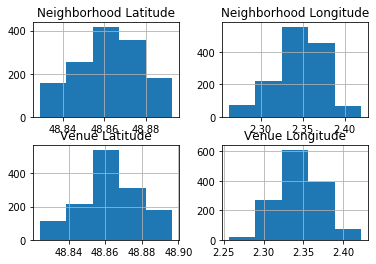

In [14]:
#Venues were returned by Foursquare in Paris.
Paris_venues.hist(bins = 5)

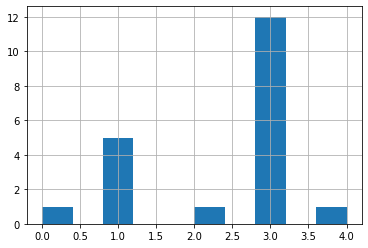

In [107]:
Paris_merged['Cluster Labels'].hist()

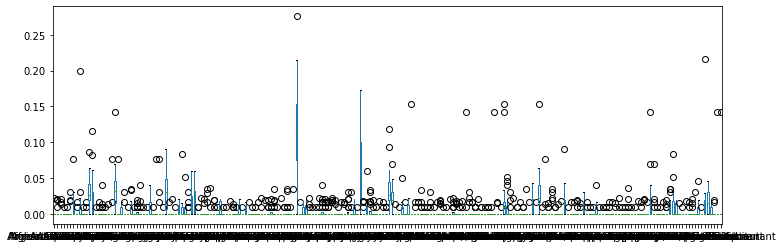

In [102]:
Paris_grouped.plot.box(figsize = (12,4))

In [108]:
# import plotly for dataframe visualisation

from plotly import (__version__)

In [109]:
print (__version__)

4.5.0


In [110]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [1]:
from plotly import (__version__)

In [2]:
print (__version__)

4.5.0


In [15]:
import cufflinks as cf

In [16]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [17]:
# plotly connect to the javascript to access this visualisation
init_notebook_mode(connected = True)

In [18]:
cf.go_offline()

In [30]:
Paris_merged.sum().iplot(kind = 'bar')

In [43]:
Paris_merged['1st Most Common Venue'].nunique()

9

In [44]:
Downtown_merged['1st Most Common Venue'].nunique()

6

In [45]:
manhattan_merged['1st Most Common Venue'].nunique()

20

### Conclusion 1: The 1st Most Common Value in Manhattan is the most diverse.  